# **Noise Models**

**Gaussian noise**

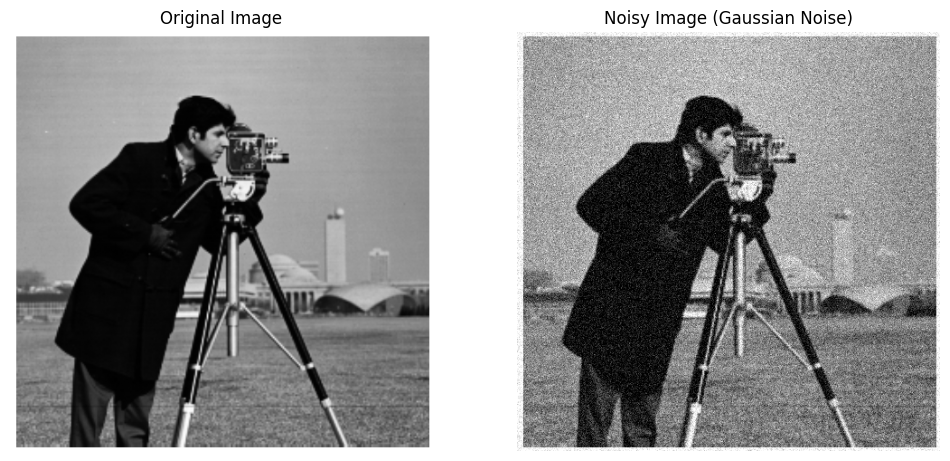

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Parameters for Gaussian noise
mean = 0
std_dev = 25  # Standard deviation of the noise

# Generate Gaussian noise
gaussian_noise = np.random.normal(mean, std_dev, image.shape)

# Add the noise to the original image
noisy_image = image + gaussian_noise

# Clip values to be in the range [0, 255] and convert to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display the original and noisy images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis('off')

plt.show()


**Rayleigh noise**

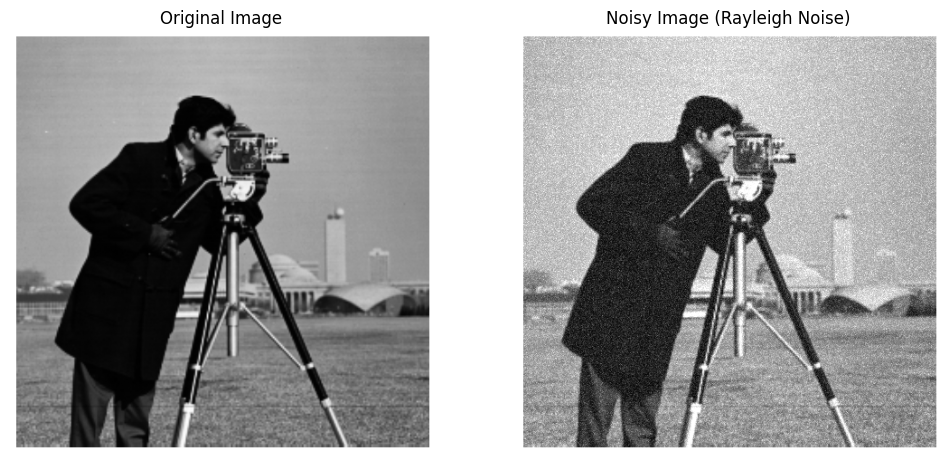

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Parameters for Rayleigh noise
scale = 25  # Scale parameter for Rayleigh distribution

# Generate Rayleigh noise
rayleigh_noise = np.random.rayleigh(scale, image.shape)

# Add the noise to the original image
noisy_image = image + rayleigh_noise

# Clip values to be in the range [0, 255] and convert to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display the original and noisy images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Rayleigh Noise)")
plt.axis('off')

plt.show()

**Erlang (Gamma) noise**

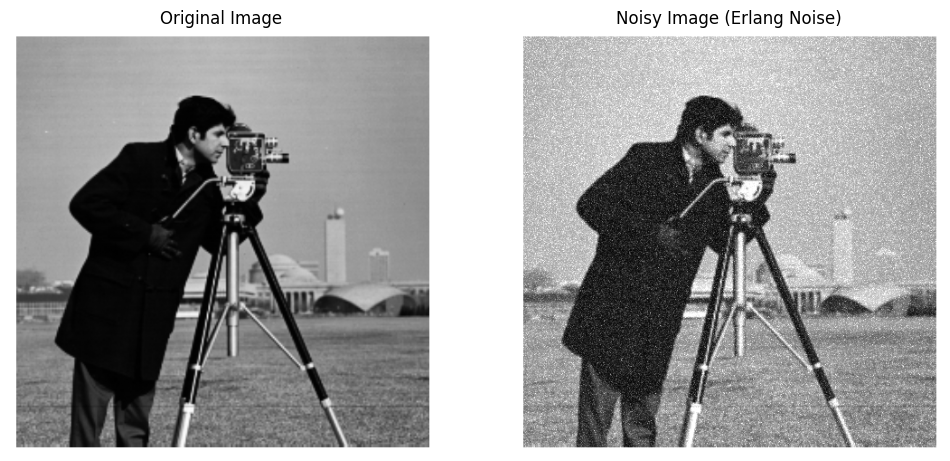

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Parameters for Erlang (Gamma) noise
shape = 2    # Shape parameter (k)
scale = 15   # Scale parameter (θ)

# Generate Erlang (Gamma) noise
erlang_noise = np.random.gamma(shape, scale, image.shape)

# Add the noise to the original image
noisy_image = image + erlang_noise

# Clip values to be in the range [0, 255] and convert to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display the original and noisy images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Erlang Noise)")
plt.axis('off')

plt.show()

**Exponential noise**

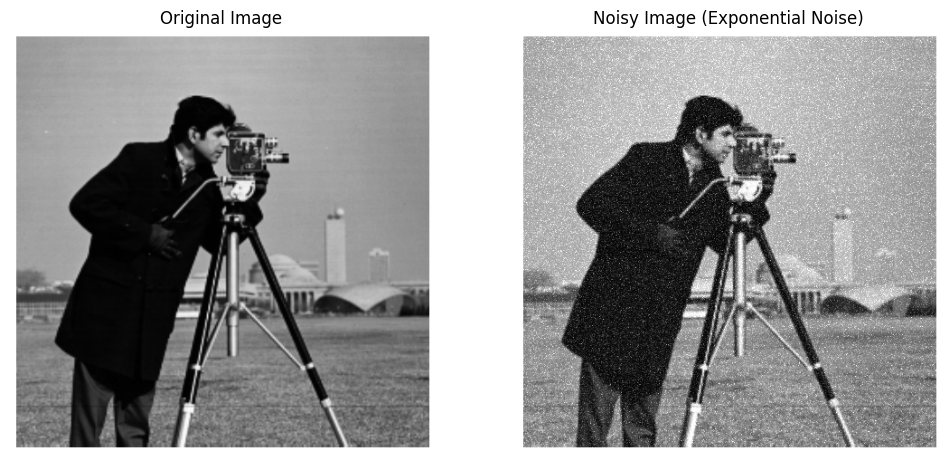

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Parameter for Exponential noise
lambda_param = 0.05  # Rate parameter (λ)

# Generate Exponential noise
exponential_noise = np.random.exponential(1/lambda_param, image.shape)

# Add the noise to the original image
noisy_image = image + exponential_noise

# Clip values to be in the range [0, 255] and convert to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display the original and noisy images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Exponential Noise)")
plt.axis('off')

plt.show()

**Uniform noise**

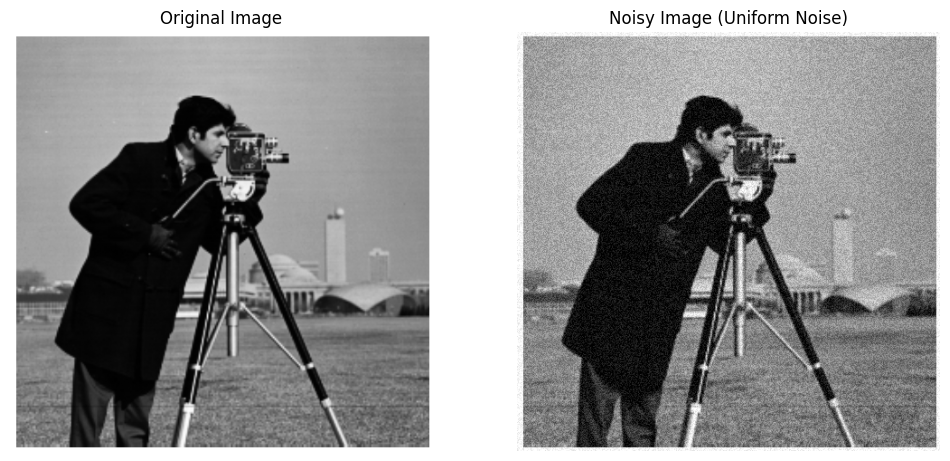

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Parameters for Uniform noise
low = -30  # Lower bound of noise
high = 30  # Upper bound of noise

# Generate Uniform noise
uniform_noise = np.random.uniform(low, high, image.shape)

# Add the noise to the original image
noisy_image = image + uniform_noise

# Clip values to be in the range [0, 255] and convert to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display the original and noisy images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Uniform Noise)")
plt.axis('off')

plt.show()

**Salt-and-Pepper noise**

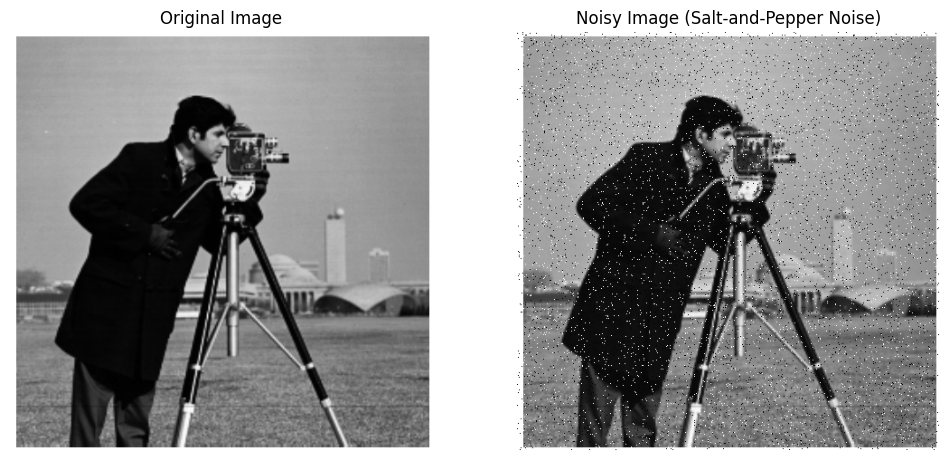

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Parameters for Salt-and-Pepper noise
salt_prob = 0.02  # Probability of salt noise
pepper_prob = 0.02  # Probability of pepper noise

# Copy the original image
noisy_image = np.copy(image)

# Generate Salt noise
num_salt = np.ceil(salt_prob * image.size)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
noisy_image[coords[0], coords[1]] = 255

# Generate Pepper noise
num_pepper = np.ceil(pepper_prob * image.size)
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
noisy_image[coords[0], coords[1]] = 0

# Display the original and noisy images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Salt-and-Pepper Noise)")
plt.axis('off')

plt.show()

# **Estimation of degradation function by observation**

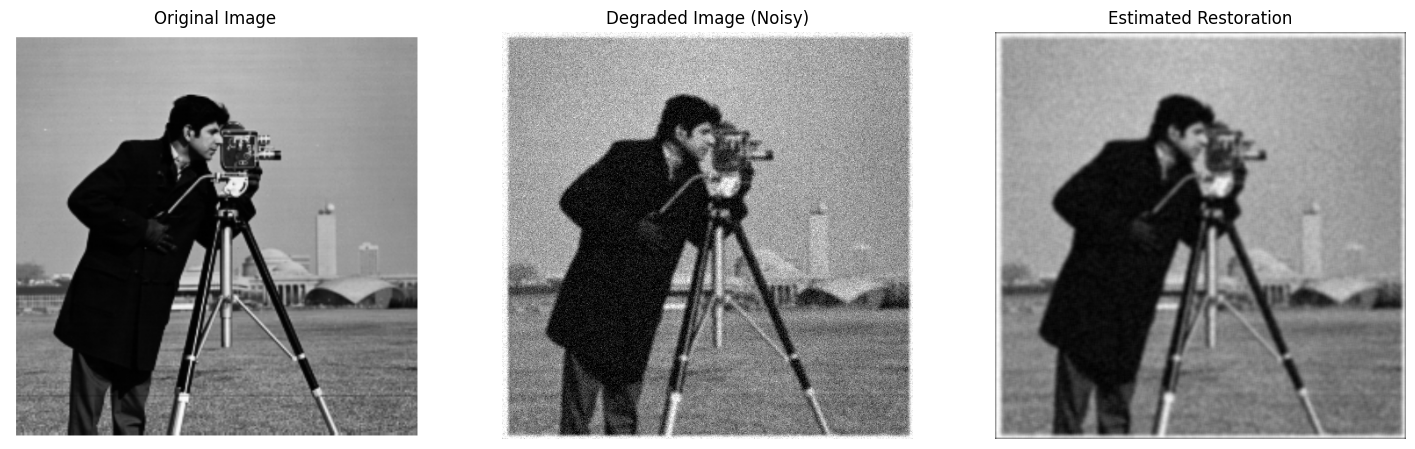

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, wiener

# Load the original image
original = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Simulate degradation with Gaussian blur
kernel_size = 5
sigma = 2
kernel = cv2.getGaussianKernel(kernel_size, sigma)
degradation_function = kernel @ kernel.T

# Apply the degradation function to the original image
degraded = convolve2d(original, degradation_function, mode='same', boundary='wrap')

# Add Gaussian noise to simulate realistic degradation
noise_sigma = 20
noise = np.random.normal(0, noise_sigma, original.shape)
degraded_noisy = degraded + noise

# Clip values to be in the range [0, 255] and convert to uint8
degraded_noisy = np.clip(degraded_noisy, 0, 255).astype(np.uint8)

# Estimate the degradation using Wiener filter
estimated = wiener(degraded_noisy, (kernel_size, kernel_size), noise_sigma**2)

# Clip and convert to uint8 for display
estimated = np.clip(estimated, 0, 255).astype(np.uint8)

# Display the images
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Degraded Image (Noisy)
plt.subplot(1, 3, 2)
plt.imshow(degraded_noisy, cmap='gray')
plt.title("Degraded Image (Noisy)")
plt.axis('off')

# Estimated Restoration
plt.subplot(1, 3, 3)
plt.imshow(estimated, cmap='gray')
plt.title("Estimated Restoration")
plt.axis('off')

plt.show()

# **Estimation of degradation function by Experimentation**

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)


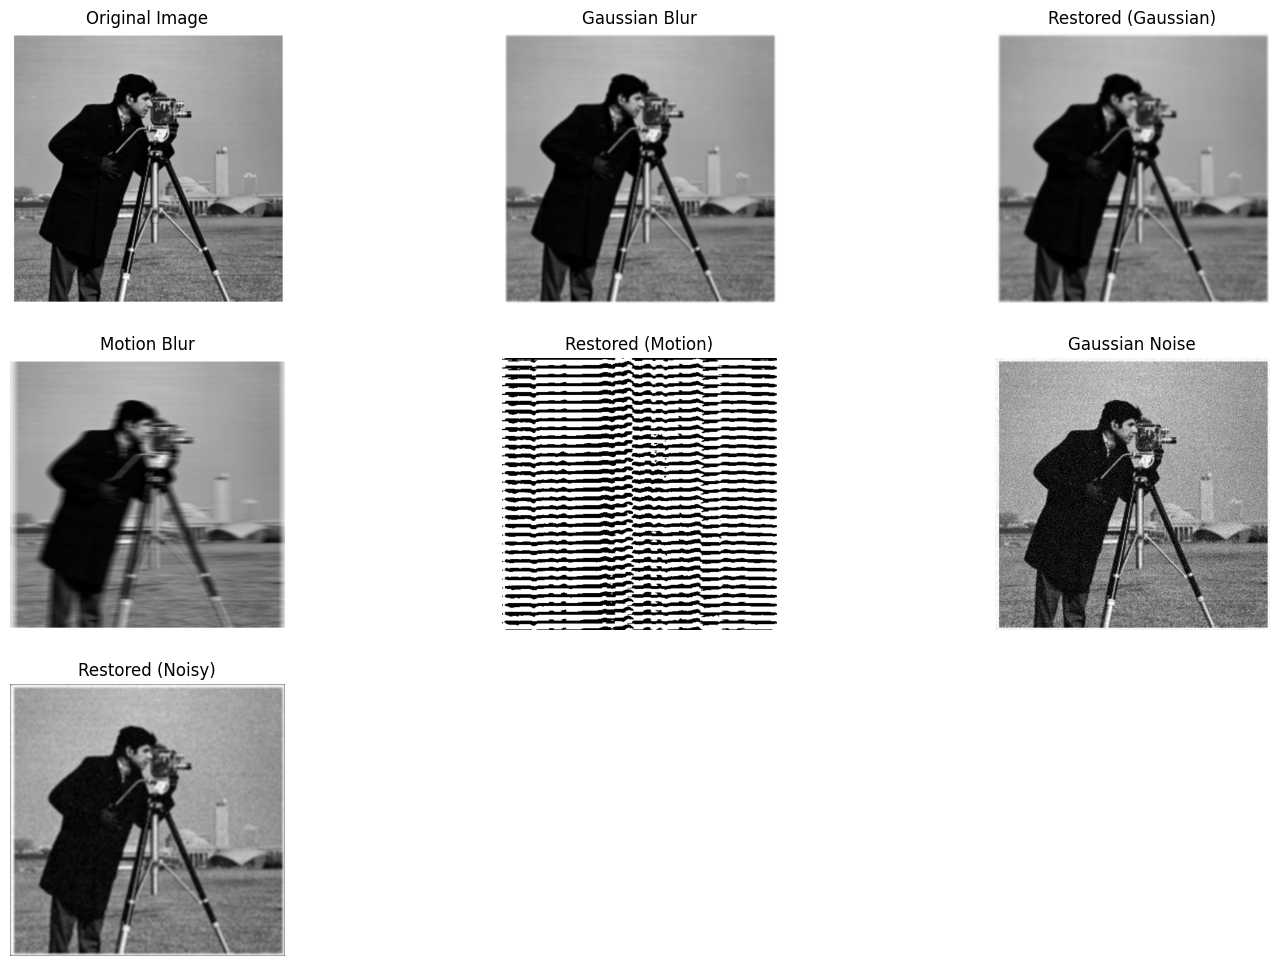

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, wiener
from skimage import restoration

# Load the original image in grayscale
original = cv2.imread('thr.png', cv2.IMREAD_GRAYSCALE)

# Function to apply Gaussian blur
def apply_gaussian_blur(image, kernel_size=5, sigma=2):
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel = kernel @ kernel.T
    degraded = convolve2d(image, gaussian_kernel, mode='same', boundary='wrap')
    return degraded

# Function to apply Motion Blur
def apply_motion_blur(image, size=15):
    kernel_motion_blur = np.zeros((size, size))
    kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel_motion_blur /= size
    degraded = convolve2d(image, kernel_motion_blur, mode='same', boundary='wrap')
    return degraded

# Function to add Gaussian Noise
def add_gaussian_noise(image, mean=0, sigma=20):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

# Experiment with different degradation models
degraded_gaussian = apply_gaussian_blur(original)
degraded_motion = apply_motion_blur(original)
degraded_noisy = add_gaussian_noise(original)

# Estimation using Wiener Filter for Gaussian Blur
estimated_gaussian = wiener(degraded_gaussian, (5, 5), 20**2)

# Estimation using Wiener Filter for Motion Blur
estimated_motion = restoration.wiener(degraded_motion, np.ones((15, 15))/15, 1e-3)

# Estimation using Wiener Filter for Noisy Image
estimated_noisy = wiener(degraded_noisy, (5, 5), 20**2)

# Display the images
plt.figure(figsize=(18, 12))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gaussian Blur
plt.subplot(3, 3, 2)
plt.imshow(degraded_gaussian, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

# Estimated Restoration (Gaussian)
plt.subplot(3, 3, 3)
plt.imshow(estimated_gaussian, cmap='gray')
plt.title("Restored (Gaussian)")
plt.axis('off')

# Motion Blur
plt.subplot(3, 3, 4)
plt.imshow(degraded_motion, cmap='gray')
plt.title("Motion Blur")
plt.axis('off')

# Estimated Restoration (Motion)
plt.subplot(3, 3, 5)
plt.imshow(estimated_motion, cmap='gray')
plt.title("Restored (Motion)")
plt.axis('off')

# Gaussian Noise
plt.subplot(3, 3, 6)
plt.imshow(degraded_noisy, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')

# Estimated Restoration (Noisy)
plt.subplot(3, 3, 7)
plt.imshow(estimated_noisy, cmap='gray')
plt.title("Restored (Noisy)")
plt.axis('off')

plt.show()